# Plot the Graph for the total number of issues with different labels created and closed on every date on GitHub for SPM587FA18 issues project

### Example of Issue Form Filled out

### Data Set File:  SPM587FA18issues.json

In [1]:
import os

#import cPickle as pickle

import pandas as pd                                    # panda's nickname is pd

import numpy as np                                     # numpy as np

from pandas import DataFrame, Series                   # for convenience

import matplotlib.pyplot as plt

%matplotlib inline



# Requirement : Get the total number of issues with different labels for every date and plot them in a stacked chart

In [2]:
# Read the JSON file into a list of dictionaries

import json
list_of_issues_dict_data = [json.loads(line) for line in open('SPM587FA18issues.json')]

In [3]:
# Create the DataFrame object for the list_of_issues_dict_data object

issues_df = DataFrame(list_of_issues_dict_data)

In [4]:
# Sanity test: print first 10 rows in our DataFrame

issues_df
    

,Author,State,closed_at,created_at,issue_number,labels
0,QFA18SCM70G,closed,2018-11-19,2018-11-17,356,"[Category:Inquiry, DetectionPhase:Field, Origi..."
1,AFA18SCM21V,closed,2018-11-17,2018-11-17,354,"[Category:Bug, DetectionPhase:Testing, Origina..."
2,SFA18SCM75J,closed,2018-11-17,2018-11-17,352,"[Category:Bug, DetectionPhase:Testing, Origina..."
3,AFA18SCM64A,closed,2018-11-17,2018-11-16,350,"[Category:Inquiry, DetectionPhase:Field, Origi..."
4,BFA18SCM78Z,closed,2018-11-17,2018-11-16,348,"[Category:Inquiry, DetectionPhase:Field, Origi..."
5,KFA18SCM64T,closed,2018-11-16,2018-11-16,347,"[Category:Inquiry, DetectionPhase:Field, Origi..."
6,CFA18SCM71R,closed,2018-11-16,2018-11-16,345,"[Category:Enhancement, DetectionPhase:Testing,..."
7,AFA18SCM57S,closed,2018-11-17,2018-11-16,343,"[Category:Bug, DetectionPhase:Testing, Origina..."
8,fazfar,closed,2018-11-16,2018-11-16,340,"[Category:Inquiry, DetectionPhase:Field, Origi..."
9,PFA18SCM42I,closed,2018-11-16,2018-11-16,336,"[Category:Inquiry, DetectionPhase:Field, Origi..."


In [5]:
# Prepare and Clean the dataframe object

wrangled_issues_df = issues_df[['Author','State','closed_at','created_at','issue_number','labels']]
wrangled_issues_df.loc[0:len(wrangled_issues_df), 'OriginationPhase']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'DetectionPhase']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Category']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Priority']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Status']= np.NaN


In [6]:
wrangled_issues_df

,Author,State,closed_at,created_at,issue_number,labels,OriginationPhase,DetectionPhase,Category,Priority,Status
0,QFA18SCM70G,closed,2018-11-19,2018-11-17,356,"[Category:Inquiry, DetectionPhase:Field, Origi...",NaN,NaN,NaN,NaN,NaN
1,AFA18SCM21V,closed,2018-11-17,2018-11-17,354,"[Category:Bug, DetectionPhase:Testing, Origina...",NaN,NaN,NaN,NaN,NaN
2,SFA18SCM75J,closed,2018-11-17,2018-11-17,352,"[Category:Bug, DetectionPhase:Testing, Origina...",NaN,NaN,NaN,NaN,NaN
3,AFA18SCM64A,closed,2018-11-17,2018-11-16,350,"[Category:Inquiry, DetectionPhase:Field, Origi...",NaN,NaN,NaN,NaN,NaN
4,BFA18SCM78Z,closed,2018-11-17,2018-11-16,348,"[Category:Inquiry, DetectionPhase:Field, Origi...",NaN,NaN,NaN,NaN,NaN
5,KFA18SCM64T,closed,2018-11-16,2018-11-16,347,"[Category:Inquiry, DetectionPhase:Field, Origi...",NaN,NaN,NaN,NaN,NaN
6,CFA18SCM71R,closed,2018-11-16,2018-11-16,345,"[Category:Enhancement, DetectionPhase:Testing,...",NaN,NaN,NaN,NaN,NaN
7,AFA18SCM57S,closed,2018-11-17,2018-11-16,343,"[Category:Bug, DetectionPhase:Testing, Origina...",NaN,NaN,NaN,NaN,NaN
8,fazfar,closed,2018-11-16,2018-11-16,340,"[Category:Inquiry, DetectionPhase:Field, Origi...",NaN,NaN,NaN,NaN,NaN
9,PFA18SCM42I,closed,2018-11-16,2018-11-16,336,"[Category:Inquiry, DetectionPhase:Field, Origi...",NaN,NaN,NaN,NaN,NaN


In [7]:
for i in range(0, len(wrangled_issues_df)):
   if wrangled_issues_df.iloc[i]['labels']:
        for label in wrangled_issues_df.iloc[i]['labels']:
            label_name= (label.split(':'))[0]
            label_value= (label.split(':'))[1]
            wrangled_issues_df.loc[i, label_name]=label_value
 

In [8]:
wrangled_issues_df

,Author,State,closed_at,created_at,issue_number,labels,OriginationPhase,DetectionPhase,Category,Priority,...,StatusPallavi,Latitute,Longitute,DetectionPhasePallavi,CategoryPallavi,OriginationPhasePallavi,longitude,Address,Latitude,Longitude
0,QFA18SCM70G,closed,2018-11-19,2018-11-17,356,"[Category:Inquiry, DetectionPhase:Field, Origi...",Coding,Field,Inquiry,High,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFA18SCM21V,closed,2018-11-17,2018-11-17,354,"[Category:Bug, DetectionPhase:Testing, Origina...",Requirements,Testing,Bug,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SFA18SCM75J,closed,2018-11-17,2018-11-17,352,"[Category:Bug, DetectionPhase:Testing, Origina...",Design,Testing,Bug,Critical,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFA18SCM64A,closed,2018-11-17,2018-11-16,350,"[Category:Inquiry, DetectionPhase:Field, Origi...",Coding,Field,Inquiry,High,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BFA18SCM78Z,closed,2018-11-17,2018-11-16,348,"[Category:Inquiry, DetectionPhase:Field, Origi...",Coding,Field,Inquiry,High,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,KFA18SCM64T,closed,2018-11-16,2018-11-16,347,"[Category:Inquiry, DetectionPhase:Field, Origi...",Coding,Field,Inquiry,High,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,CFA18SCM71R,closed,2018-11-16,2018-11-16,345,"[Category:Enhancement, DetectionPhase:Testing,...",Design,Testing,Enhancement,Critical,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,AFA18SCM57S,closed,2018-11-17,2018-11-16,343,"[Category:Bug, DetectionPhase:Testing, Origina...",Requirements,Testing,Bug,Critical,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,fazfar,closed,2018-11-16,2018-11-16,340,"[Category:Inquiry, DetectionPhase:Field, Origi...",Design,Field,Inquiry,Low,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,PFA18SCM42I,closed,2018-11-16,2018-11-16,336,"[Category:Inquiry, DetectionPhase:Field, Origi...",Coding,Field,Inquiry,Medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


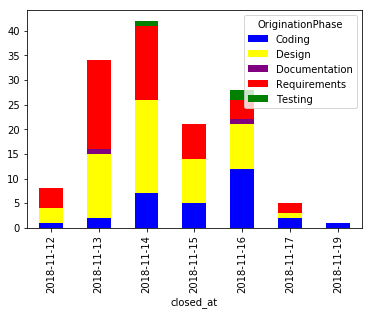

In [9]:
# Plot in Bar Chart the total number of issues closed every day for every Origination Phase

LabelsReviewedByDate = wrangled_issues_df.groupby(['closed_at','OriginationPhase']).closed_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple', 'red', 'green'], grid=False)

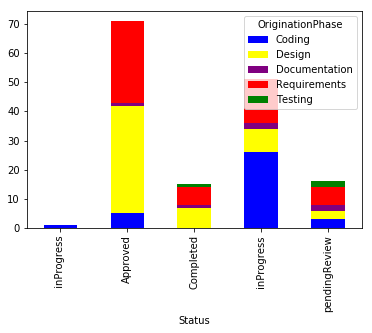

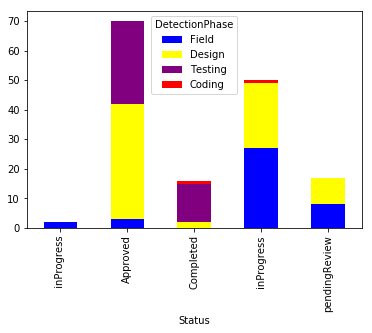

In [10]:
# Plot in Bar Chart the total number of issues created for every Phase based on thier Status

LabelsReviewedByDate = wrangled_issues_df.groupby(['Status','OriginationPhase']).created_at.count()


dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple', 'red', 'green'], grid=False)

LabelsReviewedByDate = wrangled_issues_df.groupby(['Status','DetectionPhase']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple', 'red', 'green'], grid=False)


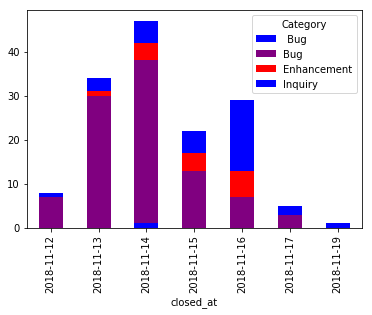

In [11]:
# Plot in Bar Chart the total number of issues closed every day for every Category

LabelsReviewedByDate = wrangled_issues_df.groupby(['closed_at','Category']).closed_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue', 'purple', 'red'], grid=False)